Question 1:

The standard deviation is calculated using the datapoints from a single sample and finds the variance of the data from its mean. The standard error of the mean is the fluctuation of the mean if the samples were randomly selected from the initial sample. This means it is standard deviation of the means calculated using bootstrapping.

Question 6:
1. Bootstrapping is done by taking an initial sample and creating thousands of resamples by randomly picking points of data from the initial sample. Then the mean of these samples are gathered and a confidence interval is created by finding where 95% of the means lie. This confidence interval shows where the mean is most likely to be if the tests were to be conducted again.

2. The purpose of bootstrapping is to calculate the average mean of samples if they were to be tested without spending a lot of money and time on redoing the tests.

3. First use bootstrapping to create thousands of resamples of the sample n. Then calculate the means of the resamples and plot them on a histogram. Using this distribution calculate the confidence interval which contains 95% of the means in the distribution. If the guess lies within the confidence interval, then it is a plausible hypothesis.

Question 8

Problem Introduction:
The problem is to find if a new vaccine is effectively increasing patients health using data released by AliTech.

Null Hypothesis:
A null hypothesis of "no effect" in this case would mean that the vaccine had no significant effect on the patients health.

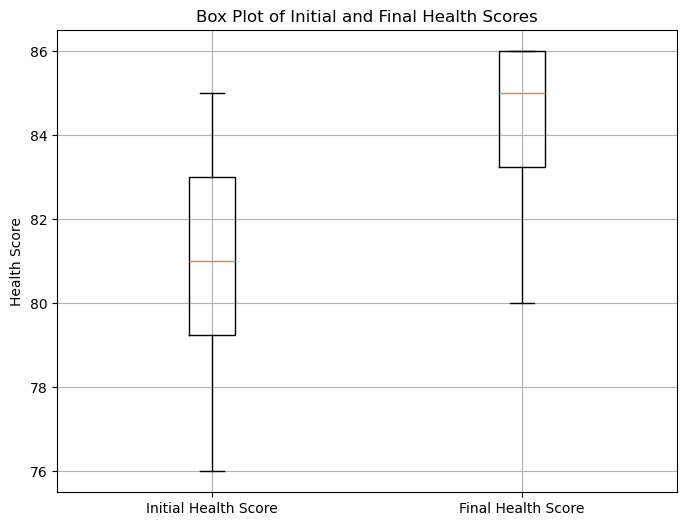

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data_dict = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Box plot of Initial and Final Health Scores
plt.figure(figsize=(8, 6))
plt.boxplot([data['InitialHealthScore'], data['FinalHealthScore']], labels=['Initial Health Score', 'Final Health Score'])

# Add title and labels
plt.title('Box Plot of Initial and Final Health Scores')
plt.ylabel('Health Score')
plt.grid(True)

# Display plot
plt.show()


In [6]:
import pandas as pd

# Create the vaccine data as a DataFrame
data_dict = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to a DataFrame
data = pd.DataFrame(data_dict)

# Save the data to a CSV file (write mode)
data.to_csv("vaccine_data.csv", index=False)

# Now read the CSV file
data = pd.read_csv("vaccine_data.csv")

# Show the DataFrame
data.head()


,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84


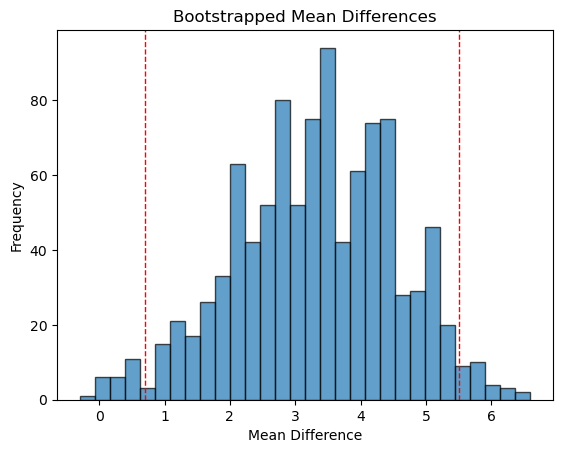

95% Confidence Interval: [0.7 5.5]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Load the data
data = pd.read_csv("vaccine_data.csv")

# Calculate differences between Final and Initial Health Scores
data['HealthScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping function
def bootstrap_mean(data, n_resamples=1000):
    means = []
    for _ in range(n_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(resample))
    return np.array(means)

# Perform bootstrapping on the Health Score differences
bootstrapped_means = bootstrap_mean(data['HealthScoreDifference'])

# Calculate 95% confidence interval
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Visualization of bootstrapped means
plt.hist(bootstrapped_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(conf_interval[0], color='red', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='red', linestyle='dashed', linewidth=1)
plt.title('Bootstrapped Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()

print(f"95% Confidence Interval: {conf_interval}")


Conclusion:
The confidence interval for the sample is 0.7 to 5.5 which does not include 0 which means that the vaccine did not have a null result of "no result" and on average ended up increasing the patients health. 

Further Consideration:
Further tests could be done using bootstrapping to find if thye vaccine had different effects on subgroups such as age or gender.

Here's a summary of our conversation:

Vaccine Data Analysis Assignment:

You are working on a vaccine data analysis assignment for AliTech, focusing on whether their new vaccine is effective in improving health scores.
The dataset includes columns for PatientID, Age, Gender, InitialHealthScore, and FinalHealthScore.
Analysis Approach:

I suggested a structured outline for your report, which includes sections on problem introduction, null hypothesis, data visualization, quantitative analysis using bootstrapping, findings, discussion, conclusion, and further considerations.
You received a code example for bootstrapping the analysis, which involved calculating differences between initial and final health scores and constructing confidence intervals.
Data Visualization:

I created and presented a scatter plot comparing initial and final health scores and a box plot showing the distribution of these scores.
You requested code to generate the box plot in JupyterHub, which I provided.
File Handling Issue:

You encountered a FileNotFoundError when trying to read a CSV file. I suggested creating the CSV file directly within the Jupyter notebook or working with the DataFrame without reading from a file.
Next Steps:

I offered assistance for any further analysis, visualization, or clarifications regarding your assignment.
If you have any further questions or need additional assistance, feel free to ask!

https://chatgpt.com/share/66ff6dbd-794c-8004-aba8-dea05966fdd0